In [34]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

data = pd.read_csv('cleandate.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['Date']=data['Date'].map(dt.datetime.toordinal)
data['Revenue'] = data['price'] * data['num_subscribers']
data.head(5)

,course_id,price,num_subscribers,num_reviews,num_lectures,rating,content_duration,level,subject,paid,Date,Revenue
0,695656,195,31499,450,46,0.76,4.0,2,4,1,735961,6142305
1,511934,0,30531,1948,53,0.78,3.0,1,4,0,735779,0
2,267560,0,29990,1342,87,0.95,17.5,2,4,0,735455,0
3,866460,195,29348,780,66,0.31,3.0,2,4,1,736297,5722860
4,151668,0,29167,1463,8,0.18,1.5,1,1,0,735380,0


In [35]:
data_business = data[data['subject']==1]
data_design = data[data['subject']==2]
data_music = data[data['subject']==3]
data_web = data[data['subject']==4]

In [3]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,rating,content_duration,level,subject,paid,Date,Revenue
count,3.536000e+03,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3.536000e+03
mean,6.816935e+05,64.141686,2281.784502,79.965781,34.045814,0.610484,3.364734,1.624152,2.491233,0.918835,735936.002545,1.643454e+05
std,3.412144e+05,59.324271,4022.245793,209.707837,29.314838,0.335477,3.366609,0.748690,1.240948,0.273127,408.943748,4.619525e+05
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,734327.000000,0.000000e+00
25%,4.136892e+05,20.000000,104.000000,4.000000,14.000000,0.270000,1.000000,1.000000,1.000000,1.000000,735683.750000,1.560000e+03
50%,6.922220e+05,45.000000,850.500000,17.000000,25.000000,0.760000,2.000000,1.000000,3.000000,1.000000,735995.000000,2.172000e+04
75%,9.642080e+05,95.000000,2343.000000,58.000000,43.000000,0.930000,4.000000,2.000000,4.000000,1.000000,736269.250000,1.092750e+05
max,1.282064e+06,200.000000,31499.000000,2709.000000,187.000000,1.000000,22.000000,4.000000,4.000000,1.000000,736516.000000,6.142305e+06


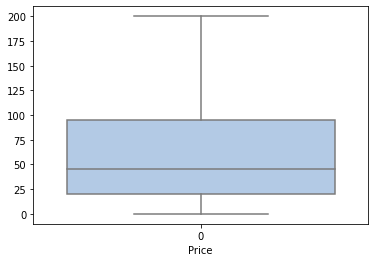

In [36]:
ax = sns.boxplot(data=data['price'],  color='#ABC9ED')
plt.xlabel('Price', fontsize=10)
plt.show()

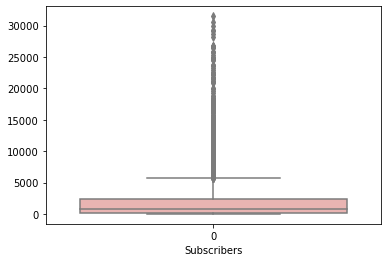

In [38]:
ax = sns.boxplot(data=data['num_subscribers'], color='#F2ABA9')
plt.xlabel('Subscribers')
plt.show()

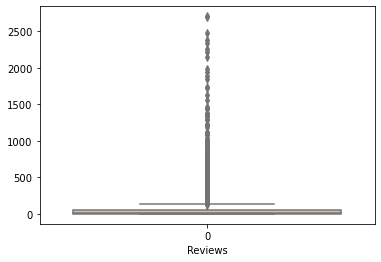

In [43]:
ax = sns.boxplot(data=data['num_reviews'],  color='#F1B792')
plt.xlabel('Reviews')
plt.show()

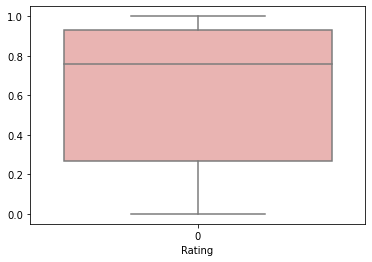

In [44]:
ax = sns.boxplot(data=data['rating'],  color='#F2ABA9')
plt.xlabel('Rating')
plt.show()

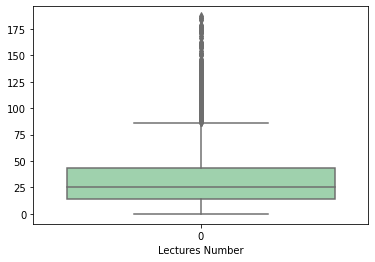

In [41]:
ax = sns.boxplot(data=data['num_lectures'], color='#97D9A9')
plt.xlabel('Lectures Number')
plt.show()

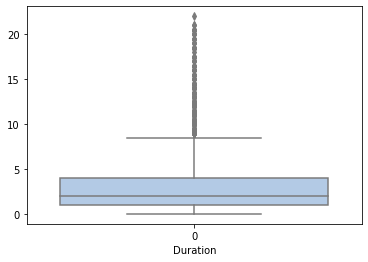

In [42]:
ax = sns.boxplot(data=data['content_duration'], color='#ABC9ED')
plt.xlabel('Duration')
plt.show()

In [11]:
# Create X and y arrays
X = data["Date"].values.reshape(-1, 1)
y = data["Revenue"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

plt.scatter(X, y,color='g')
plt.plot(X_test, y_pred, color='k')

plt.show()

print(reg.coef_)
print(reg.intercept_)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

In [5]:
# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: -0.0013421716779893345
RMSE: 518082.23399982986


In [6]:
# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=5)

# Compute 5-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

[ 0.00339115  0.00119249 -0.01814845 -0.00087361 -0.00256015]
-0.0033997137356648333
0.007639571701501412
[-0.01658962  0.00317128]


In [7]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
    
print(ridge_scores)#underfitting does not occur because they are stable

[-0.0013421716784411952, -0.001342171682507498, -0.0013421717231667518, -0.0013421721297615097, -0.0013421761957002065, -0.0013422168543291146]


Predictions: [ 72506.08522812 115097.5267956 ], Actual Values: [  6200 102150]


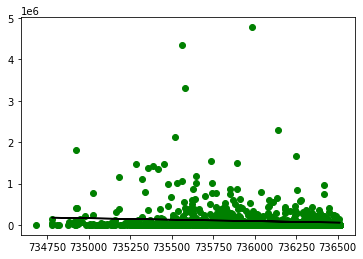

[-69.82203536]
51480725.16736274


In [54]:
#Business
# Create X and y arrays
X = data_business["Date"].values.reshape(-1, 1)
y = data_business["Revenue"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg_bus = LinearRegression()

# Fit the model to the data
reg_bus.fit(X_train, y_train)

# Make predictions
y_pred = reg_bus.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

plt.scatter(X, y,color='g')
plt.plot(X_test, y_pred, color='k')

plt.show()

print(reg_bus.coef_)
print(reg_bus.intercept_)

In [43]:
# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: -0.0317373433364323
RMSE: 87127.84106826832


Predictions: [271306.37955582 512307.25815246], Actual Values: [ 24300 249160]


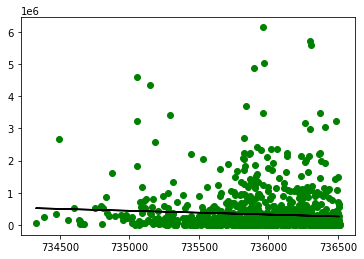

[-117.84884039]
87059199.30299927


In [51]:
# Data web
# Create X and y arrays
X = data_web["Date"].values.reshape(-1, 1)
y = data_web["Revenue"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg_web = LinearRegression()

# Fit the model to the data
reg_web.fit(X_train, y_train)

# Make predictions
y_pred = reg_web.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

plt.scatter(X, y,color='g')
plt.plot(X_test, y_pred, color='k')

plt.show()

print(reg_web.coef_)
print(reg_web.intercept_)

Predictions: [94032.07867977 92993.72079961], Actual Values: [  100 10550]


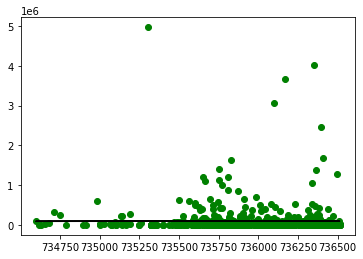

[-69.82203536]
51480725.16736274


In [53]:
#Data design
# Create X and y arrays
X = data_design["Date"].values.reshape(-1, 1)
y = data_design["Revenue"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg_design = LinearRegression()

# Fit the model to the data
reg_design.fit(X_train, y_train)

# Make predictions
y_pred = reg_design.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

plt.scatter(X, y,color='g')
plt.plot(X_test, y_pred, color='k')

plt.show()

print(reg.coef_)
print(reg.intercept_)

Predictions: [66879.80749398 45159.05864635], Actual Values: [  150 18320]


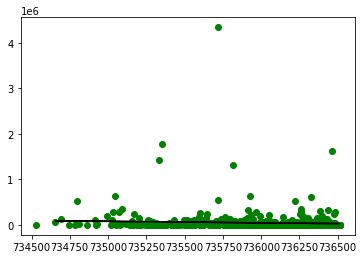

[-33.11089763]
24415309.49132273


In [52]:
# Data music 
# Create X and y arrays
X = data_music["Date"].values.reshape(-1, 1)
y = data_music["Revenue"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg_music = LinearRegression()

# Fit the model to the data
reg_music.fit(X_train, y_train)

# Make predictions
y_pred = reg_music.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

plt.scatter(X, y,color='g')
plt.plot(X_test, y_pred, color='k')

plt.show()

print(reg_music.coef_)
print(reg_music.intercept_)